In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

In [26]:
!pip install -q gdown

# Descargar el archivo ZIP con el ID correcto
!gdown --id 1lRGX9-wSWqcBrCA6G2UgTjNCyTYtj1wS -O Set-Original.zip
!unzip -q Set-Original.zip -d letras_data
!ls letras_data

# español https://drive.google.com/file/d/1Gzew6mDwT2y-Bftk_eTyCJDTK5B9d7Mq/view?usp=sharing
# griego https://drive.google.com/file/d/1lRGX9-wSWqcBrCA6G2UgTjNCyTYtj1wS/view?usp=sharing


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1lRGX9-wSWqcBrCA6G2UgTjNCyTYtj1wS
To: /content/Set-Original.zip
100% 1.10M/1.10M [00:00<00:00, 126MB/s]
replace letras_data/Set-Original/Dataset/alpha/alpha_1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
replace letras_data/Set-Original/Dataset/alpha/alpha_10.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: all
error:  invalid response [all]
replace letras_data/Set-Original/Dataset/alpha/alpha_10.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: All
greek-letters  Set-Original


In [27]:
!ls letras_data/Set-Original/


Dataset


In [28]:
import os
import cv2
import numpy as np

X = []
y = []

base_dir = 'letras_data/Set-Original/Dataset'

for letra in sorted(os.listdir(base_dir)):
    ruta_letra = os.path.join(base_dir, letra)
    if not os.path.isdir(ruta_letra):
        continue

    # for tipo in ['may', 'min']:
    #     ruta_tipo = os.path.join(ruta_letra, tipo)
    #     if not os.path.isdir(ruta_tipo):
    #         continue

    for archivo in os.listdir(ruta_letra):
        if archivo.endswith('.png'):
            img_path = os.path.join(ruta_letra, archivo)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (28, 28))
            img = img / 255.0

            etiqueta = letra.lower()

            X.append(img)
            y.append(etiqueta)

X = np.array(X)
y = np.array(y)

np.save('X_letras.npy', X)
np.save('y_letras.npy', y)

print("Guardado exitoso:", X.shape, y.shape)

Guardado exitoso: (2400, 28, 28) (2400,)


Shape de X: (2400, 28, 28)
Shape de y: (2400,)
Etiquetas únicas: ['alpha' 'epsilon' 'kappa' 'nu' 'rho' 'upsilon']


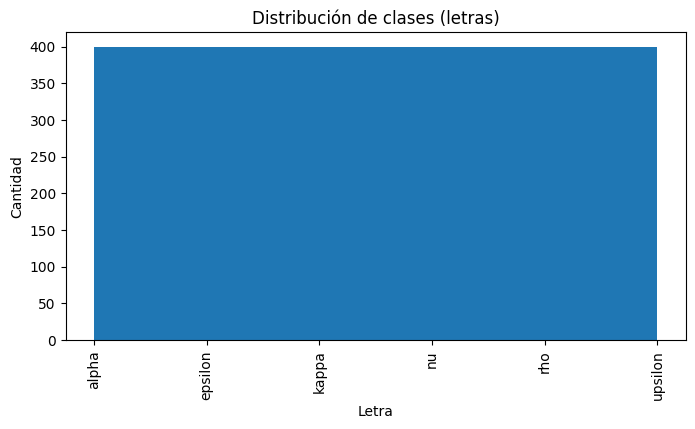

In [29]:

print("Shape de X:", X.shape)
print("Shape de y:", y.shape)
print("Etiquetas únicas:", np.unique(y))

# Histograma de distribución de clases
plt.figure(figsize=(8,4))
plt.hist(y, bins=len(np.unique(y)))
plt.title("Distribución de clases (letras)")
plt.xlabel("Letra")
plt.ylabel("Cantidad")
plt.xticks(rotation=90)
plt.show()


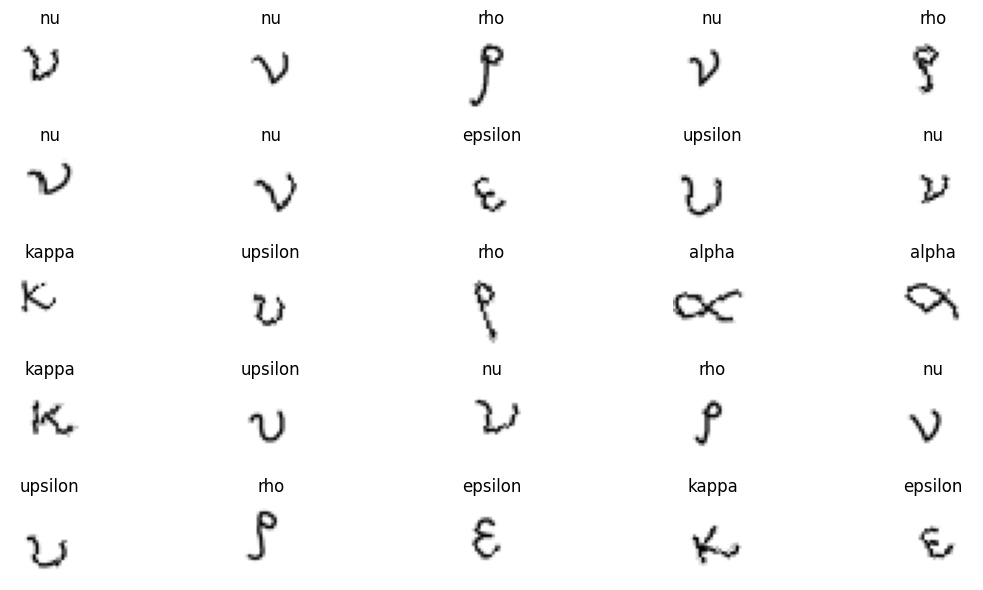

In [30]:
plt.figure(figsize=(12,6))
for i in range(25):
    idx = np.random.randint(0, X.shape[0])
    plt.subplot(5,5,i+1)
    plt.title(y[idx])
    plt.imshow(X[idx], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [33]:
import numpy as np

X = np.load('X_letras.npy')
y = np.load('y_letras.npy')

print(X.shape)  # (N, 28, 28)
print(y.shape)  # (N,)
print(np.unique(y))  # Verifica letras disponibles


(2400, 28, 28)
(2400,)
['alpha' 'epsilon' 'kappa' 'nu' 'rho' 'upsilon']


In [34]:

# Convertir letras a números únicos (ej. 'A'→0, 'b'→1, ...)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Puedes revertir con: le.inverse_transform([0, 1, 2, ...])


In [35]:


# Separar 80% entrenamiento, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Expandir dimensión para canal (grises)
if X_train.ndim == 3:
    X_train = X_train[..., None]
    X_test = X_test[..., None]


In [36]:


num_clases = len(np.unique(y_encoded))  # Total de letras

model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, 3, activation='relu', padding='same'),
    MaxPool2D(),
    Conv2D(64, 3, activation='relu', padding='same'),
    MaxPool2D(),
    Conv2D(128, 3, activation='relu', padding='same'),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_clases, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,030 (941.52 KB)

 Trainable params: 241,030 (941.52 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
log = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=20
)


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.2145 - loss: 1.7784 - val_accuracy: 0.6500 - val_loss: 1.2698
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6623 - loss: 0.9618 - val_accuracy: 0.8333 - val_loss: 0.4462
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.8509 - loss: 0.3973 - val_accuracy: 0.8500 - val_loss: 0.3631
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8729 - loss: 0.2988 - val_accuracy: 0.9125 - val_loss: 0.2547
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9298 - loss: 0.1936 - val_accuracy: 0.9104 - val_loss: 0.2268
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.9306 - loss: 0.1889 - val_accuracy: 0.9292 - val_loss: 0.1736
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9715 - loss: 0.1073 - val_accuracy: 0.9333 - val_loss: 0.1855
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.9659 - loss: 0.0979 - val_accuracy: 0.9333 - v

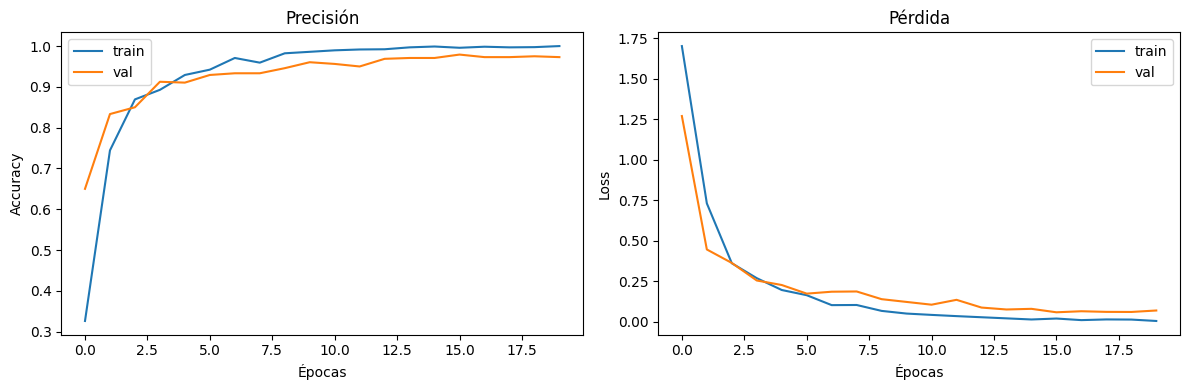

In [39]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(log.history['accuracy'], label='train')
plt.plot(log.history['val_accuracy'], label='val')
plt.title('Precisión')
plt.xlabel('Épocas'); plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(log.history['loss'], label='train')
plt.plot(log.history['val_loss'], label='val')
plt.title('Pérdida')
plt.xlabel('Épocas'); plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


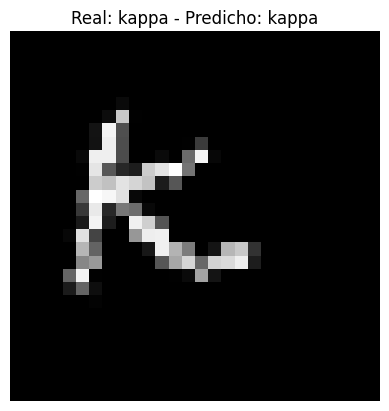

In [40]:
idx = np.random.choice(X_test.shape[0], 1)[0]
im = X_test[idx]
label = y_test[idx]

# Predecir
salida = model.predict(im[None, :, :, :])[0]
pred_index = np.argmax(salida)
pred_letra = le.inverse_transform([pred_index])[0]
real_letra = le.inverse_transform([label])[0]

# Mostrar
plt.title(f"Real: {real_letra} - Predicho: {pred_letra}")
plt.imshow(-im[:, :, 0], cmap='gray')
plt.axis('off')
plt.show()


In [41]:
# guardar modelo
model.save('models/modelo_letras_g.h5')
print("Modelo guardado como ../models/modelo_letras_g.h5")


Modelo guardado como ../models/modelo_letras_g.h5


In [ ]:
# Cargar el modelo
from tensorflow.keras.models import load_model

model_cargado = load_model('../models/modelo_letras.h5')
print("Modelo cargado correctamente")
model_cargado.summary()


Modelo cargado correctamente


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 54)             │         6,966 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,224 (965.72 KB)

 Trainable params: 247,222 (965.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)